# <font color = 'pink'><b>Employee Attrition Analysis</b></font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('D:\Python work\Data Analysis Projects\Employee Attrition\Attrition data.csv')

In [4]:
df.sample(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1233,1234,36,Yes,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,1,Research Director,Single,54860,7.0,Y,12,8,1,10.0,2,5,0,3,3.0,1.0,3.0,3,3
177,178,33,Yes,Travel_Rarely,Research & Development,10,3,Life Sciences,1,Female,4,Research Director,Married,67280,7.0,Y,22,8,0,15.0,2,7,7,7,2.0,3.0,4.0,2,4
3310,3311,37,No,Travel_Rarely,Sales,24,2,Life Sciences,1,Female,4,Laboratory Technician,Divorced,42570,4.0,Y,15,8,0,9.0,2,1,0,0,4.0,3.0,3.0,3,3
2288,2289,54,No,Travel_Frequently,Sales,10,3,Life Sciences,1,Female,4,Research Scientist,Divorced,37610,3.0,Y,12,8,0,26.0,3,14,1,12,2.0,4.0,3.0,2,3
4040,4041,31,No,Travel_Rarely,Sales,9,4,Life Sciences,1,Female,1,Sales Executive,Divorced,161240,2.0,Y,23,8,1,8.0,2,5,1,4,3.0,4.0,3.0,2,4


In [5]:
df.shape

(4410, 29)

In [6]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## <font color = 'pink'><b>Data Preprocessing</b></font>

In [8]:
# After checking the dataset i found that i can fill the missing values with the most frequent value in the column
# df.NumCompaniesWorked.value_counts() # mostfrequent
# df.EnvironmentSatisfaction.value_counts() # mostfrequent
# df.JobSatisfaction.value_counts() # mostfrequent
# df.WorkLifeBalance.value_counts() # mostfrequent
# df.TotalWorkingYears.value_counts() # mean

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp = SimpleImputer(strategy='most_frequent')
imp2 = SimpleImputer(strategy='mean')

In [11]:
df['NumCompaniesWorked'] = imp.fit_transform(df[['NumCompaniesWorked']])
df['EnvironmentSatisfaction'] = imp.fit_transform(df[['EnvironmentSatisfaction']])
df['JobSatisfaction'] = imp.fit_transform(df[['JobSatisfaction']])
df['WorkLifeBalance'] = imp.fit_transform(df[['WorkLifeBalance']])
df['TotalWorkingYears'] = imp2.fit_transform(df[['TotalWorkingYears']])

In [13]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)

In [14]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

Now we have successfully filled the missing values of each columns with the appropriate values in this they all are the most frequent values of each column.  

In [15]:
df.sample(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
656,657,55,No,Non-Travel,Research & Development,27,3,Life Sciences,1,Female,2,Manager,Divorced,48590,1.0,Y,24,8,1,34,3,33,15,0,4.0,2.0,3.0,4,4
1164,1165,35,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,Male,2,Healthcare Representative,Married,78980,7.0,Y,15,8,0,5,2,2,2,2,4.0,3.0,3.0,2,3
2998,2999,49,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,3,Manufacturing Director,Single,73140,7.0,Y,22,8,0,25,2,7,0,7,3.0,3.0,3.0,3,4
2490,2491,36,No,Travel_Rarely,Research & Development,27,3,Technical Degree,1,Female,4,Research Scientist,Married,50560,7.0,Y,12,8,0,15,2,12,5,7,4.0,1.0,3.0,2,3
250,251,35,No,Travel_Rarely,Research & Development,10,5,Medical,1,Female,4,Laboratory Technician,Single,134580,1.0,Y,11,8,0,17,3,17,11,8,2.0,4.0,3.0,3,3


## <font color = 'pink'><b>Visualizaiton</b></font>

Text(0, 0.5, 'Age')

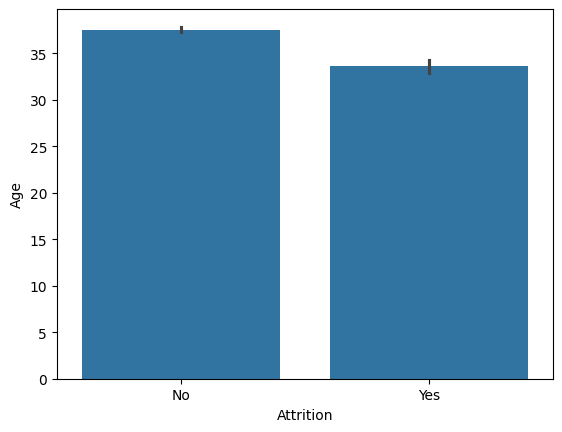

In [16]:
# Age vs Attrition
sns.barplot(x='Attrition', y='Age', data=df)
plt.xlabel('Attrition')
plt.ylabel('Age')

Text(0, 0.5, 'Count')

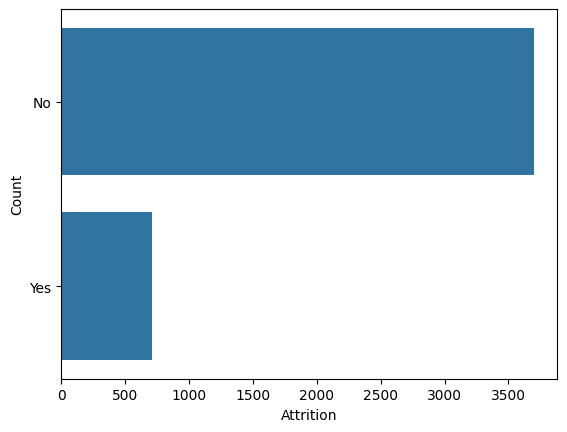

In [17]:
# overall attrition rate
sns.countplot(df['Attrition'])
plt.xlabel('Attrition')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

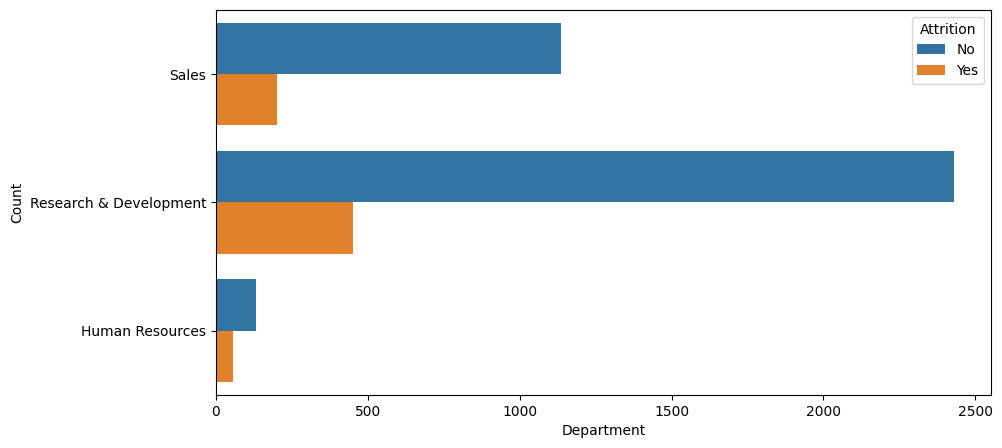

In [18]:
# Attrition rate by Department
plt.figure(figsize=(10, 5))
sns.countplot(y = 'Department', hue='Attrition', data = df)
plt.xlabel('Department')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

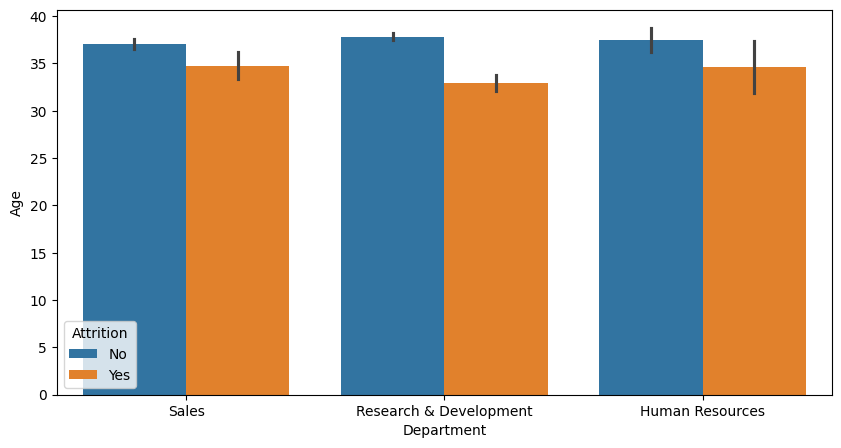

In [19]:
# Attrition by age and Department
plt.figure(figsize=(10, 5))
sns.barplot(x='Department', y='Age', hue='Attrition', data=df)
plt.xlabel('Department')
plt.ylabel('Age')

Text(0, 0.5, 'Count')

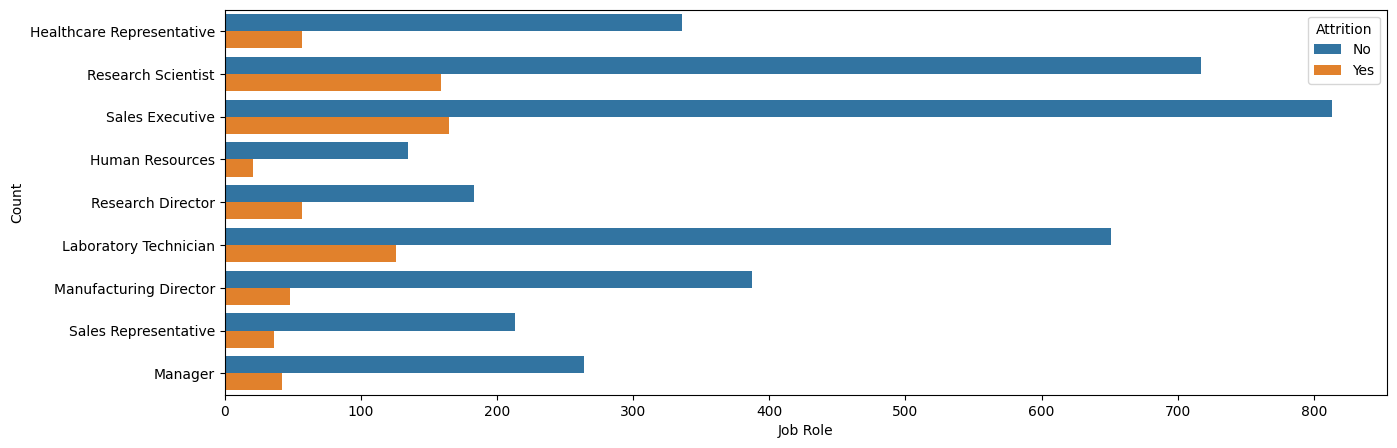

In [20]:
# Attrition rate by jobrole
plt.figure(figsize=(15, 5))
sns.countplot(y = 'JobRole', hue='Attrition', data = df)
plt.xlabel('Job Role')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

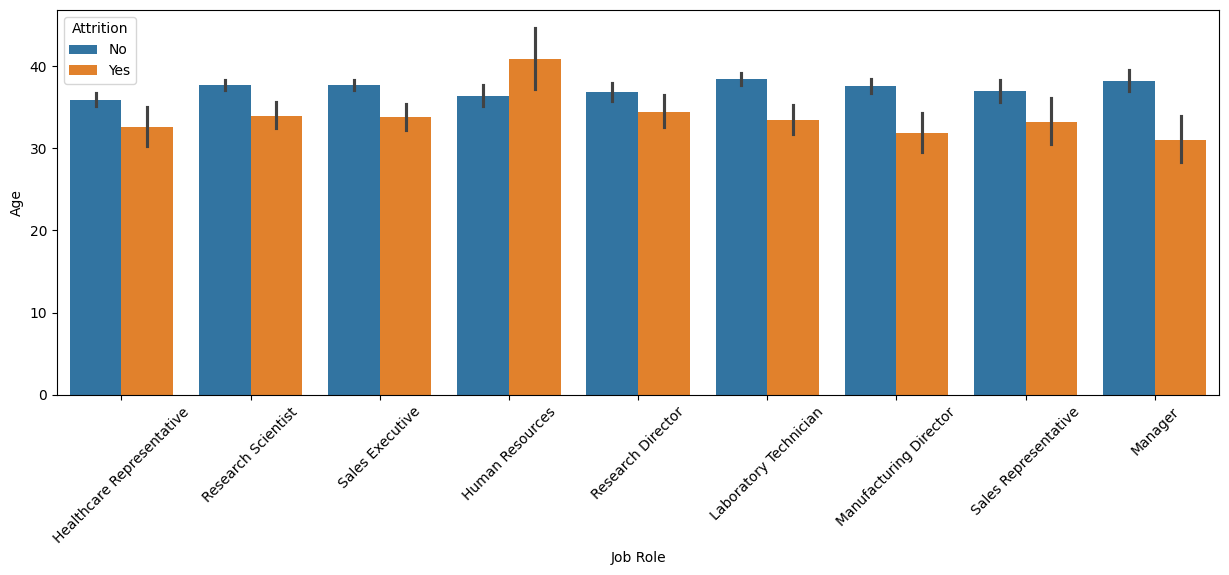

In [21]:
# Attrition by age and job role
plt.figure(figsize=(15, 5))
sns.barplot(x='JobRole', y='Age', hue='Attrition', data=df)
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.ylabel('Age')

<Axes: xlabel='Gender', ylabel='count'>

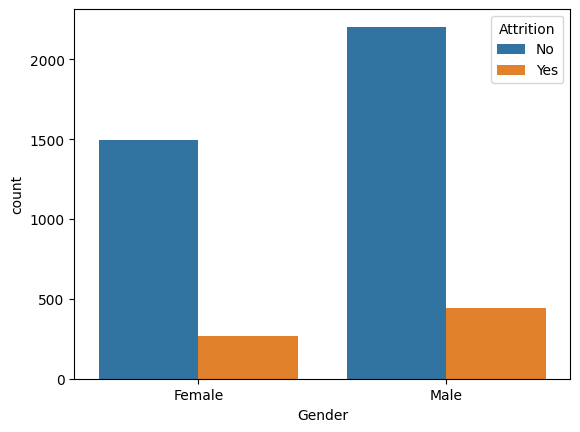

In [22]:
# Attrition by Gender 
sns.countplot(x = 'Gender', hue='Attrition', data = df)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

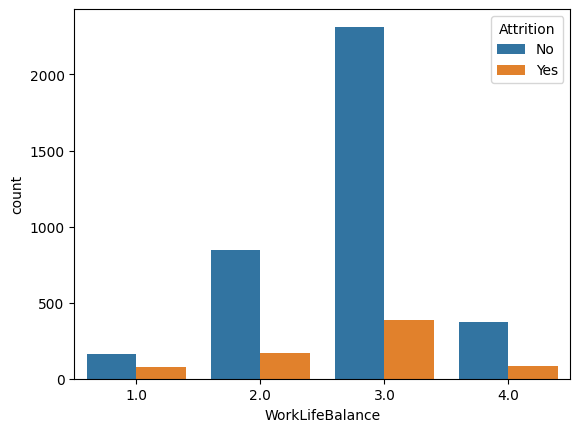

In [23]:
# Attrition by work life balance
sns.countplot(x = 'WorkLifeBalance', hue='Attrition', data = df)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

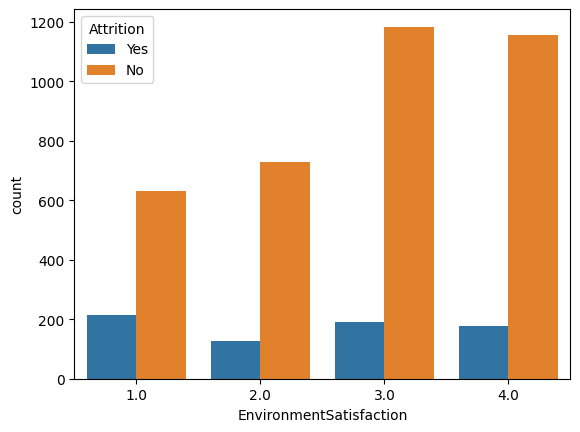

In [24]:
# Attrition by Environment Satisfaction
sns.countplot(x = 'EnvironmentSatisfaction', hue='Attrition', data = df)

Text(0, 0.5, 'Monthly Income')

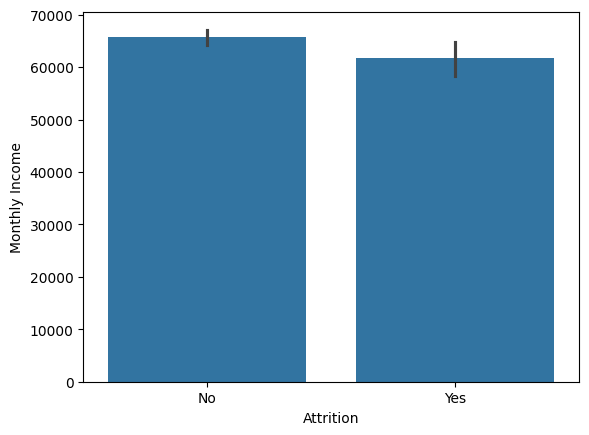

In [25]:
# Attrition by salary
sns.barplot(x='Attrition', y='MonthlyIncome', data=df)
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

Text(0, 0.5, 'Monthly Income')

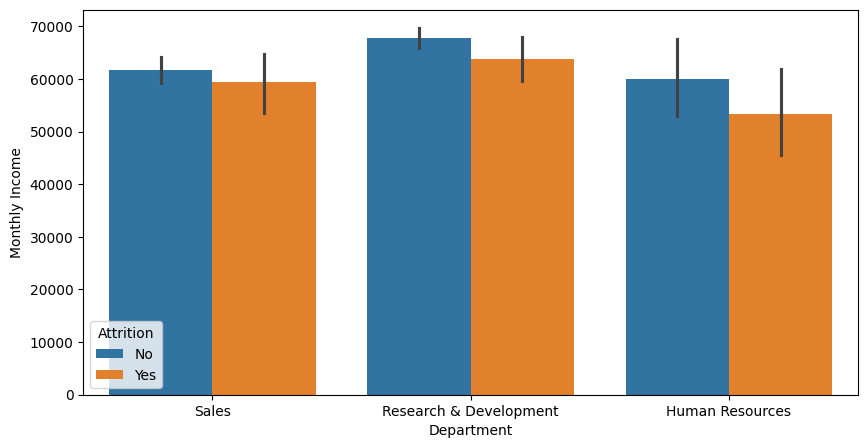

In [26]:
# Attrition by salary and Department
plt.figure(figsize=(10, 5))
sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=df)
plt.xlabel('Department')
plt.ylabel('Monthly Income')

Text(0, 0.5, 'Monthly Income')

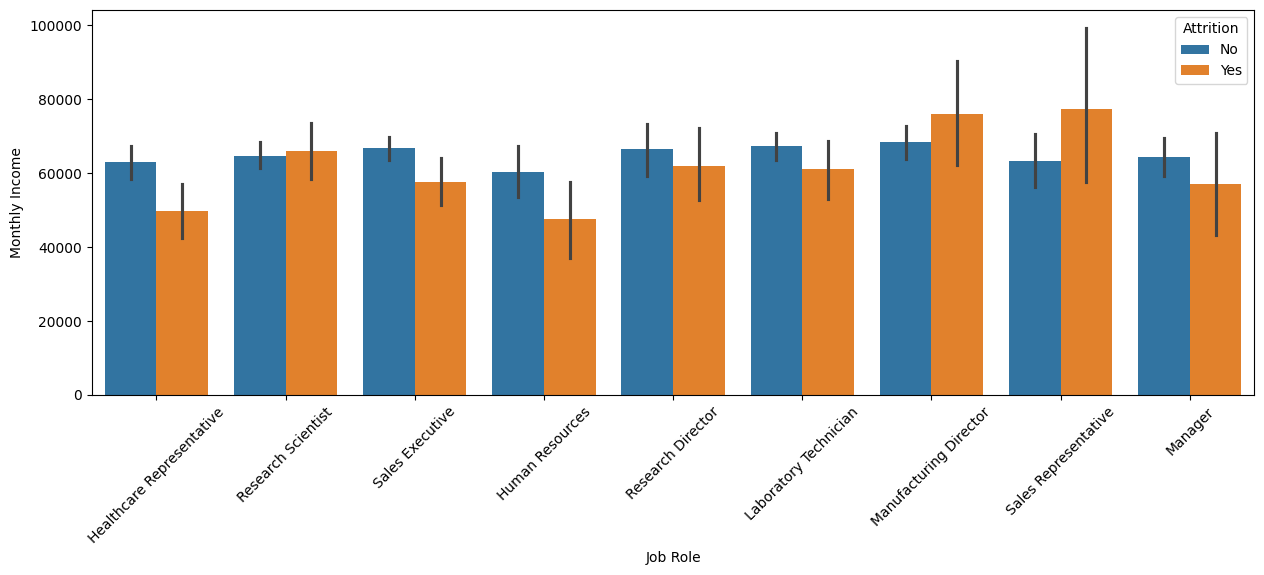

In [27]:
# Attrition by salary and Job Role
plt.figure(figsize=(15, 5))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df)
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.ylabel('Monthly Income')

<Axes: xlabel='PerformanceRating', ylabel='count'>

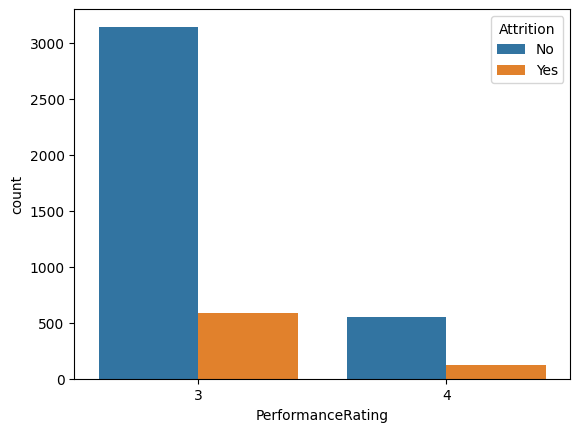

In [28]:
# Attrition rate by performance rating
sns.countplot(x = 'PerformanceRating', hue='Attrition', data = df)


<Axes: xlabel='JobLevel', ylabel='count'>

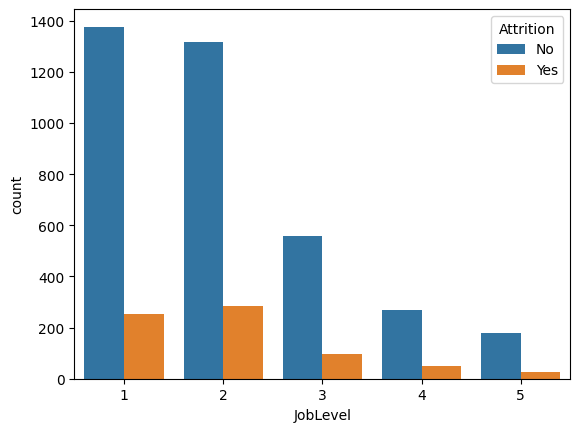

In [29]:
# Attrition by job level
sns.countplot(x = 'JobLevel', hue='Attrition', data = df)

## <font color = 'pink'><b>Model Building</b></font>

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
df.sample(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4151,4152,34,No,Travel_Rarely,Sales,4,3,Medical,1,Female,1,Sales Executive,Married,12610,2.0,Y,14,8,1,6,6,4,1,2,2.0,3.0,4.0,3,3
3502,3503,35,No,Travel_Frequently,Research & Development,9,2,Other,1,Female,1,Manufacturing Director,Divorced,104960,1.0,Y,13,8,1,5,2,5,0,2,4.0,4.0,3.0,3,3
2367,2368,39,No,Travel_Rarely,Sales,2,4,Life Sciences,1,Male,1,Laboratory Technician,Divorced,72640,0.0,Y,17,8,0,11,5,10,0,7,3.0,3.0,3.0,3,3
3657,3658,55,Yes,Travel_Rarely,Research & Development,19,3,Technical Degree,1,Male,1,Human Resources,Single,46800,6.0,Y,14,8,3,24,0,19,3,8,1.0,3.0,2.0,4,3
3972,3973,34,Yes,Travel_Frequently,Research & Development,2,1,Life Sciences,1,Male,1,Manufacturing Director,Married,134990,4.0,Y,23,8,2,11,2,7,0,7,4.0,1.0,2.0,4,4


In [54]:
le = LabelEncoder()

In [55]:
columns_to_encode = ['Department', 'Gender', 'MaritalStatus', 'JobRole', 'Attrition']
for i in columns_to_encode:
    df[i] = le.fit_transform(df[i])

<Axes: ylabel='MonthlyIncome'>

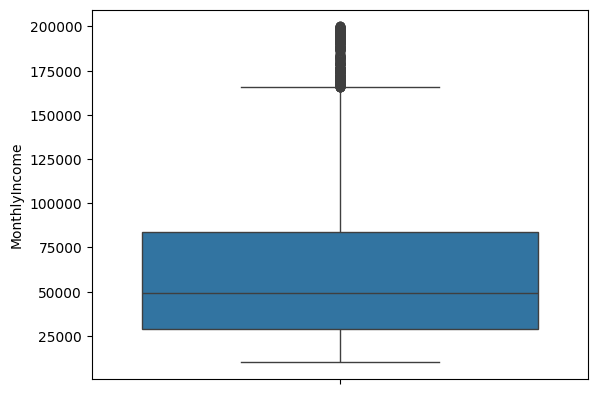

In [60]:
sns.boxplot(df['MonthlyIncome'])

As Monthly Income can be very high for some people so we cant consider outliers in this columns, and our other selected columns (features) dont have any outlier so we can proceed further

In [62]:
scaler = StandardScaler()
df[['MonthlyIncome']] = scaler.fit_transform(df[['MonthlyIncome']])

In [63]:
X = df[['Age', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'WorkLifeBalance', 'JobSatisfaction', 'PerformanceRating']]
y = df[['Attrition']]

In [64]:
X.sample(5)

,Age,Department,Gender,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,WorkLifeBalance,JobSatisfaction,PerformanceRating
2372,45,1,0,2,0,-0.305105,11,10,10,3.0,4.0,3
2286,33,1,0,7,2,-0.064154,15,14,0,3.0,3.0,3
1880,28,1,0,3,0,1.506063,20,6,2,3.0,3.0,4
2902,36,1,1,0,2,0.049310,25,16,13,4.0,2.0,4
4301,19,1,0,4,2,1.848366,18,1,1,3.0,2.0,3


In [66]:
X.sample(5)

,Age,Department,Gender,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,WorkLifeBalance,JobSatisfaction,PerformanceRating
4264,54,1,1,2,2,2.785610,17,23,5,3.0,4.0,3
869,23,1,0,3,1,0.860341,11,4,2,3.0,3.0,3
1925,45,1,0,0,0,-0.788069,19,8,5,3.0,4.0,3
2116,48,2,1,4,2,0.191883,14,25,1,4.0,4.0,3
2816,26,1,1,7,1,-0.345476,13,8,8,3.0,3.0,3


In [67]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Xtrain.isna().sum(), Xtest.isna().sum()

### <font color = 'pink'><b>Random Forest Classifier</b></font>

In [70]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtrain, ytrain)

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [71]:
rfc_ypred = rfc.predict(Xtest)

In [72]:
print(f'Accuracy : {accuracy_score(ytest, rfc_ypred)}')

Accuracy : 0.983371126228269


In [73]:
print(classification_report(ytest, rfc_ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1115
           1       1.00      0.89      0.94       208

    accuracy                           0.98      1323
   macro avg       0.99      0.95      0.97      1323
weighted avg       0.98      0.98      0.98      1323



In [74]:
print(confusion_matrix(ytest, rfc_ypred))

[[1115    0]
 [  22  186]]


---

### <font color = 'pink'><b>Support Vector Classifier</b></font>

In [75]:
svc = SVC()
svc.fit(Xtrain, ytrain)

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [76]:
svc_ypred = svc.predict(Xtest)

In [77]:
print(f'Accuracy : {accuracy_score(ytest, svc_ypred)}')

Accuracy : 0.8427815570672713


In [78]:
print(classification_report(ytest, svc_ypred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1115
           1       0.00      0.00      0.00       208

    accuracy                           0.84      1323
   macro avg       0.42      0.50      0.46      1323
weighted avg       0.71      0.84      0.77      1323



c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

---

### <font color = 'pink'><b>Logistic Regression</b></font>

In [79]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
lr_ypred = lr.predict(Xtest)

In [81]:
print(f'Accuracy : {accuracy_score(ytest, lr_ypred)}')

Accuracy : 0.8435374149659864


In [82]:
print(classification_report(ytest, lr_ypred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1115
           1       0.54      0.03      0.06       208

    accuracy                           0.84      1323
   macro avg       0.69      0.51      0.49      1323
weighted avg       0.80      0.84      0.78      1323



---

### <font color = 'pink'><b>Comparison of All models</b></font>

In [83]:
print('-'*60)
print(f'Accuracy of Logistic Regression : {accuracy_score(ytest, lr_ypred)}')
print(f'Accuracy of Support Vector Classifier : {accuracy_score(ytest, svc_ypred)}')
print(f'Accuracy of Random Forest Classifier : {accuracy_score(ytest, rfc_ypred)}')
print('-'*60)

------------------------------------------------------------
Accuracy of Logistic Regression : 0.8435374149659864
Accuracy of Support Vector Classifier : 0.8427815570672713
Accuracy of Random Forest Classifier : 0.983371126228269
------------------------------------------------------------
